<a href="https://colab.research.google.com/github/juan-a-vac/Deteccion-de-Fraude-Tarjetas-de-Credito/blob/main/Detecci%C3%B3n_de_fraude_de_tarjeta_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Entendimiento del problema y definicion del objetivo

Es importante que las compañías de tarjetas de crédito puedan reconocer las transacciones de tarjetas de crédito fraudulentas para que a los clientes no se les cobre por artículos que no compraron.

El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no se pudo obtener las funciones originales ni más información sobre los datos.

Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. 
La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción. 
Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

Data set:https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

# 2)Recoleccion de datos (Data Acquisition)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
credit_card_data = pd.read_csv('/content/gdrive/MyDrive/Curso Data Science/Proyectos DS/01) Fraude de tarjeta de crédito/creditcard.csv')

#3)Analisis de datos /  Exploratory Data Analysis (EDA) 

In [ ]:
#damos un breve vistaso al dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# informacion del dataset
info = credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
duplicados = credit_card_data.duplicated() # Marca las filas que están duplicadas
hay_duplicados = any(duplicados) # Verifica si hay algún valor True en la columna

if hay_duplicados:
    print("Hay datos duplicados en el dataset")
else:
    print("No hay datos duplicados en el dataset")

Hay datos duplicados en el dataset


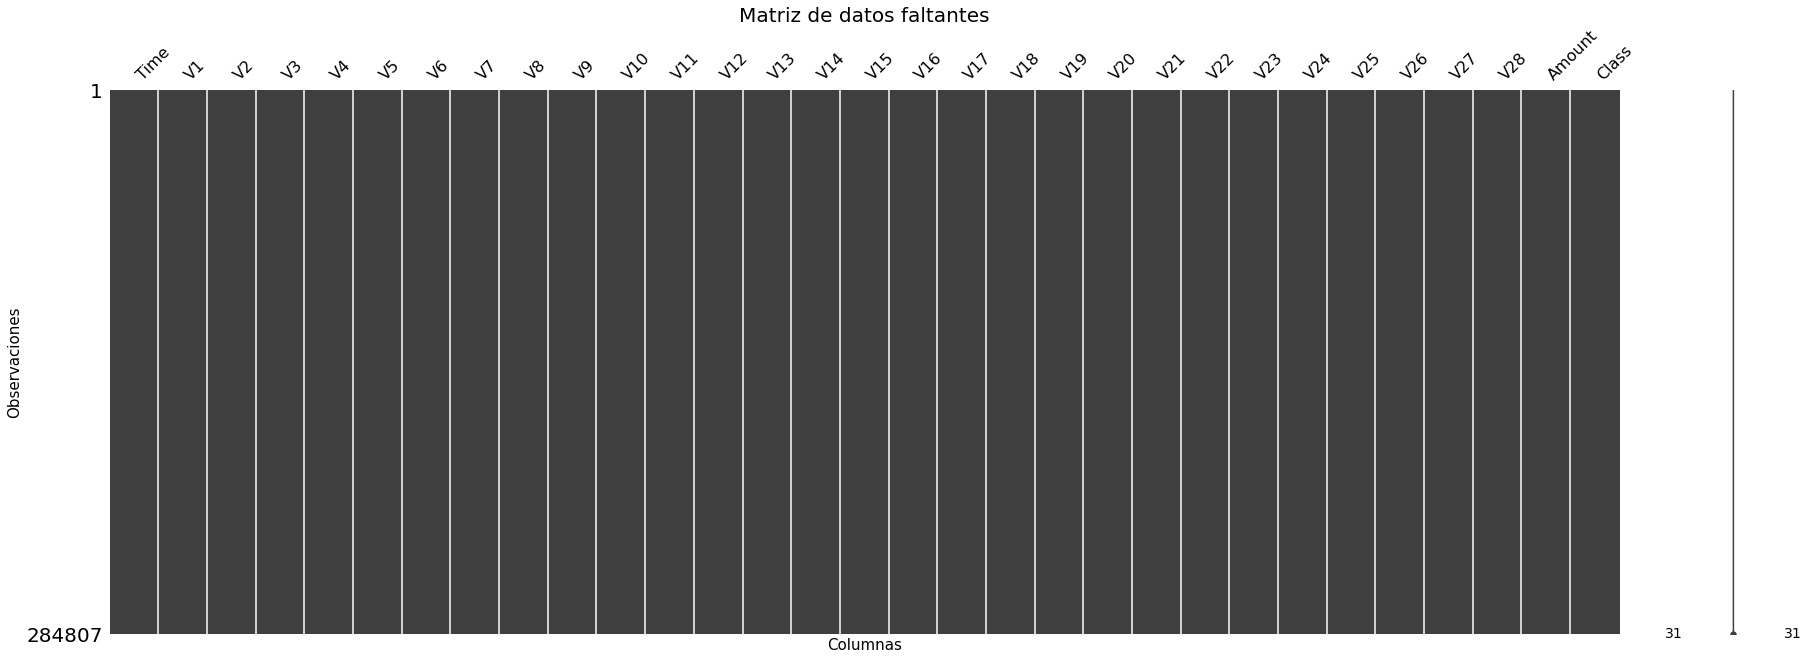

In [ ]:
# Visualizar la matriz de valores faltantes
msno.matrix(credit_card_data, figsize=(30, 10), sparkline=True)

# Configurar el título y los ejes
plt.title('Matriz de datos faltantes',fontsize=20)
plt.xlabel('Columnas',fontsize=15)
plt.ylabel('Observaciones',fontsize=15)

# Mostrar la visualización
plt.show()

No hay datos faltantes


In [ ]:
# distribución de transacciones legítimas y transacciones fraudulentas
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Este conjunto de datos presenta transacciones que ocurrieron en dos días, donde tenemos 492 fraudes de 284,807 transacciones. El conjunto de datos está muy desequilibrado, la clase positiva (fraudes) representa únicamente el 0,172 % de todas las transacciones.

0 --> Transaccion legítima

1 --> Transaccion fraudulenta

In [ ]:
# Armamos dos nuevos datasets para realizar el analisis por separado
legitima = credit_card_data[credit_card_data.Class == 0]
fraudulenta = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legitima.shape)
print(fraudulenta.shape)

(284315, 31)
(492, 31)


In [ ]:
# Medidas estadisticas de las transacciones legitimas
legitima.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
# Medidas estadisticas de las transacciones legitimas
fraudulenta.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# 4)Preprocesamiento de datos (Data Wrangling)


Se eliminan los datos duplicados


In [ ]:
print("Filas originales:", len(credit_card_data))

Filas originales: 284807


In [ ]:
credit_card_data = credit_card_data.drop_duplicates() # Elimina las filas duplicadas
print("Filas sin duplicados:", len(credit_card_data))

Filas sin duplicados: 283726


Se deberá realizar un acondicionamiento de los datos debido al desbalance del mismo respecto a el feature "Class".
Para esto re utilizara una tecnica de over sampling

In [ ]:
#importamos los paquetes
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [ ]:
data = credit_card_data.drop(columns=["Class"])
data.shape

(283726, 30)

In [ ]:
target = credit_card_data["Class"]


In [ ]:
#ROS aumenta la cantidad de muestras de la clase menos representadas
dataRos, targetRos = ros.fit_resample(data,target)
fraud_ros = targetRos.sum()
leg_ros = targetRos.shape[0]- fraud_ros
print('Las transacciones fraudulentas son ', fraud_ros, ' , las legitimas ', leg_ros  )

Las transacciones fraudulentas son  283253  , las legitimas  283253


In [ ]:
# Concatenamos los dos datasets creados anteriormente, obteniendo un nuevo dataset pero ahora con la feature "Class" balanceada
new_dataset = pd.concat([targetRos, dataRos], axis=1)

In [ ]:
new_dataset['Class'].value_counts() #ahora tenemos la misma cantidad de datos en ambas clases]

0    283253
1    283253
Name: Class, dtype: int64

#5) Modelado

In [ ]:
#Separamos en Features (x) y Targets (y)
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [ ]:
#Separamos lso tados en datos de entrenamiento y datos de testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

###5.1)Modelo 1: Modelo de Regrssion Logistica

In [ ]:
# Entrenamos el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

####5.1.2)Evaluacion del modelo

<Axes: >

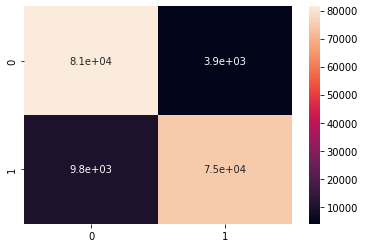

In [ ]:
# Realizamos la evaluacion del modelo
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     85426
           1       0.95      0.88      0.92     84526

    accuracy                           0.92    169952
   macro avg       0.92      0.92      0.92    169952
weighted avg       0.92      0.92      0.92    169952



###5.2)Modelo 2: Modelo por Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit (x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

####5.2.1) Evaluacion modelo 2

<Axes: >

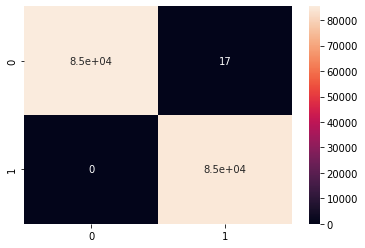

In [ ]:
# Resultados en el Conjunto de Testing
cm = confusion_matrix( y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85426
           1       1.00      1.00      1.00     84526

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



Podemos apreciar que existe una mejora del Modelo 2 respecto al Modelo 1